### CNN을 이용한 MNIST 분류기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


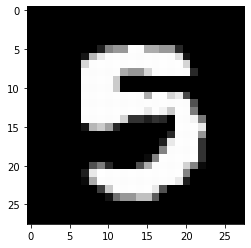

In [5]:
i = np.random.randint(1000)
print(y_train[i])
plt.imshow(x_train[i], cmap='gray')

In [6]:
### data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.3
)
datagen.fit(x_train)

In [7]:
### create model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5), filters=10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(kernel_size=(5,5), filters=15, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(5,5), filters=20, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics = ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 15)        3765      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 20)          7520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 180)               0

In [8]:
train_generator = datagen.flow(x_train, y_train, batch_size = 128, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 128, subset = 'validation')

history = model.fit_generator( train_generator,
                               epochs = 5,
                               verbose = 1,
                               validation_data = val_generator
                               )

C:\Users\ASUX\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
329/329 [==============================] - 33s 97ms/step - loss: 3.4788 - accuracy: 0.3315 - val_loss: 0.5108 - val_accuracy: 0.8435
Epoch 2/5
329/329 [==============================] - 31s 94ms/step - loss: 0.4323 - accuracy: 0.8659 - val_loss: 0.2612 - val_accuracy: 0.9187
Epoch 3/5
329/329 [==============================] - 30s 93ms/step - loss: 0.2326 - accuracy: 0.9297 - val_loss: 0.1869 - val_accuracy: 0.9417
Epoch 4/5
329/329 [==============================] - 31s 94ms/step - loss: 0.1838 - accuracy: 0.9441 - val_loss: 0.1414 - val_accuracy: 0.9578
Epoch 5/5
329/329 [==============================] - 30s 92ms/step - loss: 0.1493 - accuracy: 0.9543 - val_loss: 0.1316 - val_accuracy: 0.9593


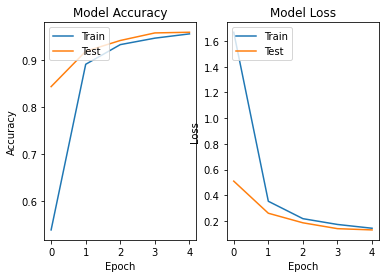

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0565 - accuracy: 0.9813
test loss : 0.05651362985372543 / test accuracy : 0.9812999963760376
